<a href="https://colab.research.google.com/github/RahulJuluru2/unit4assignments/blob/main/U4W19_42_VGG16_pre_trained_model_FlowerClassification_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Learning Objectives

At the end of the experiment, you will be able to : 
* Understand the VGG16 pre-trained model to classify flowers photos

In [ ]:
#@title Explanation Video
from IPython.display import HTML

HTML("""<video width="854" and height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/B18_Walkthrough.mp4" type="video/mp4">
</video>
""")

### Dataset

#### Description


The flowers dataset consists of 3670 samples images of flowers with 5 possible class labels.  

Each image is with range of 0-255 RGB Value. 

The dataset comprises 5 flowers:


    daisy
    dandelion
    roses
    sunflowers
    tulips

#### VGG16

The VGG16- convolutional network, is trained on ImageNet dataset (1000 classes) which is capable of extracting features from an image and train its fully connected network in order to classify different types of retinal damage instead of objects.

### Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="U4W19_42_VGG16_pre_trained_model_FlowerClassification_C" #name of the notebook

def setup():
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    ipython.magic("sx pip install Pillow")
    ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/flowerphotos.zip")
    ipython.magic("sx unzip -qq flowerphotos.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### 1. Importing the required packages

In [4]:
import numpy as np 
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import random_split
import torch.optim as optim
import matplotlib.pyplot as plt

### 2. Data Loading and Pre-processing

In [5]:
# Specify root data directory
data_dir1 = '/content/flower_photos'

for dirname, _, filenames in os.walk(data_dir1):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/flower_photos/roses/5172171681_5934378f08.jpg
/content/flower_photos/roses/16691277899_9433f39155_n.jpg
/content/flower_photos/roses/9164900485_605aa12da8.jpg
/content/flower_photos/roses/16643944275_3cd4cd966c.jpg
/content/flower_photos/roses/1485142251_ca89254442.jpg
/content/flower_photos/roses/5990626258_697f007308_n.jpg
/content/flower_photos/roses/8523394349_61b31fdd8f_m.jpg
/content/flower_photos/roses/4061451210_1650590c6a.jpg
/content/flower_photos/roses/2414954629_3708a1a04d.jpg
/content/flower_photos/roses/1756973583_4aac7df00d_m.jpg
/content/flower_photos/roses/3576488381_611f3446e0_n.jpg
/content/flower_photos/roses/19153732586_9de58c8f53_n.jpg
/content/flower_photos/roses/15319767030_e6c5602a77_m.jpg
/content/flower_photos/roses/475947979_554062a608_m.jpg
/content/flower_photos/roses/15999816377_4b95e0b538_n.jpg
/content/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg
/content/flower_photos/roses/921984328_a60076f070_m.jpg
/content/flower_photos/roses/3109712111_

In [6]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

transformer = transforms.Compose([transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),   # Resize the image to 224×224 pixels.
                                  transforms.ToTensor()])                       # Convert the image to PyTorch Tensor

# Loading the data
database = datasets.ImageFolder(data_dir1, transform=transformer)

In [7]:
# Print the classes
database.classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [8]:
# Mapping the name of the class to index
database.class_to_idx

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [9]:
# splitting the database into training and validation set
validation_size = 734
training_size = len(database) - validation_size

In [10]:
# random_split: Randomly split a dataset into non-overlapping new datasets of given lengths.
train_ds, val_ds_main = random_split(database,[training_size, validation_size])
len(train_ds), len(val_ds_main)

(2936, 734)

In [11]:
batch_size =50

# Load the data. utils.dataloader is a package for loading the dataset 
train_dl = torch.utils.data.DataLoader(train_ds, batch_size)
val_dl = torch.utils.data.DataLoader(val_ds_main,batch_size)

In [12]:
# Generate a batch of 50 images and labels
train_images, train_labels = next(iter(train_dl))
train_images.shape, train_labels.shape

(torch.Size([50, 3, 224, 224]), torch.Size([50]))

In [13]:
# Print the labels 
train_labels

tensor([1, 0, 0, 1, 2, 3, 3, 4, 0, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 4, 0, 1, 4, 0,
        1, 0, 1, 4, 4, 1, 1, 1, 2, 0, 3, 2, 0, 2, 1, 2, 1, 0, 4, 1, 4, 4, 3, 0,
        0, 1])

### 3. Plotting the sample Images

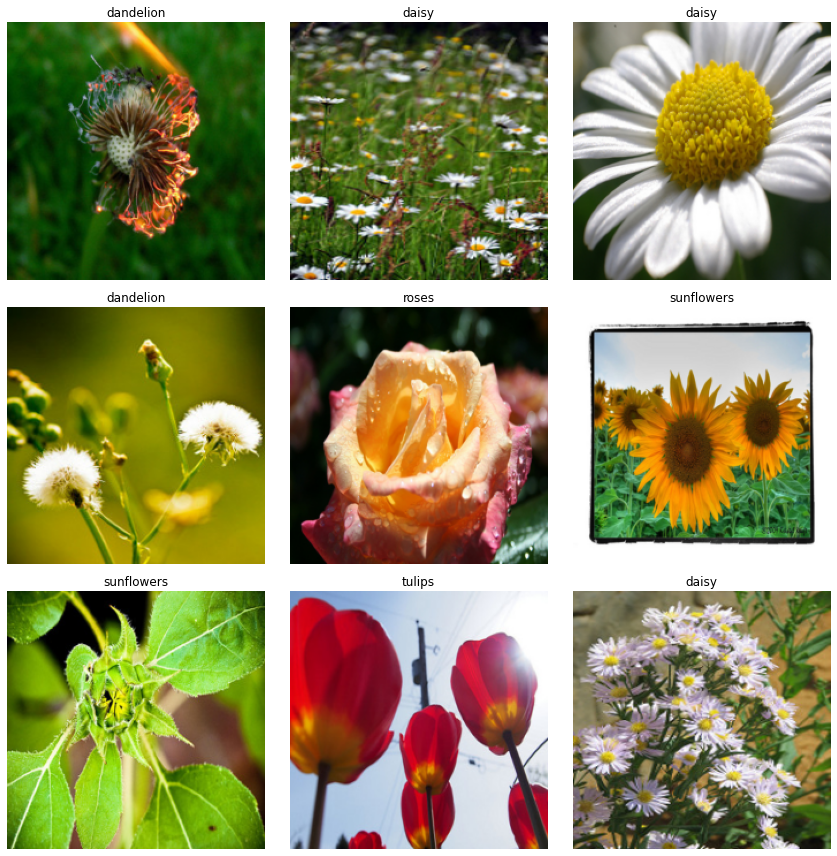

In [14]:
# Create a grid of images along with their corresponding labels
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.reshape(-1)

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i].permute(1, 2, 0))
    axes[i].set_title(database.classes[train_labels[i].item()])
    axes[i].axis('off')

plt.tight_layout()

### 4. Applying VGG16

In [15]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)
print(vgg16)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In the last layer of the classifier the VGG-16 is able to classify 1000 different labels but you just need 5 labels instead. In order to do that replace the last fully connected layer of the model with a new one with 5 output features instead of 1000.

In PyTorch, we can access the VGG-16 classifier with model.classifier, which is an 6-layer array. 



In [16]:
# Print the input features of 6th module from the classifier
num_features = vgg16.classifier[6].in_features
print(num_features)

4096


In [17]:
# Remove last layer
features = list(vgg16.classifier.children())[:-1] 
print(features)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False)]


In [18]:
# Add the linear layer with 5 outputs
features.extend([nn.Linear(num_features, 5)])
print(features) 

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=5, bias=True)]


In [19]:
# Replace the model classifier
vgg16.classifier = nn.Sequential(*features) 
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

The output above is the summary of our model. Notice that the last layer has 5 output features as we have 5 ouput classes

### 5. Initializing CUDA

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### 6. Defining the Criterion and the Loss Function

In [21]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(vgg16.parameters(), lr=0.002)

vgg16 = vgg16.to(device)

### 7. Training the model


In [22]:
# This code cell takes 20 mins to run

# No of Epochs
epoch = 5

# keeping the network in train mode
vgg16.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_dl:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Passing the data to the model (Forward Pass)
      outputs = vgg16(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(train_ds))
    train_accuracy.append(100 * correct/len(train_ds))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss:0.020232 Train Accuracy: 61.61 
epoch: 2, Train Loss:0.009413 Train Accuracy: 82.94 
epoch: 3, Train Loss:0.006889 Train Accuracy: 88.01 
epoch: 4, Train Loss:0.005752 Train Accuracy: 89.54 
epoch: 5, Train Loss:0.004945 Train Accuracy: 91.45 


### 8. Model Evaluation

In [23]:
# Keeping the network in evaluation mode 
vgg16.eval()  

Test_accuracy = 0

# Iterate through all the batches in each epoch
for images,labels in val_dl:
    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass 
    outputs = vgg16(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()

Accuracy = 100 * Test_accuracy / len(val_ds_main)
print("Accuracy of Test Data is", Accuracy)

Accuracy of Test Data is 90.32697547683924


# Please answer the questions below to complete the experiment:




In [24]:
#@title State True or False: Transfer learning means transferring the knowledge of a pretrained model to a new model by initializing the second model with the first model's weights { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["","True","False"]


In [25]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [26]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [27]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [28]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [30]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [31]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3018
Date of submission:  17 Sep 2022
Time of submission:  12:14:56
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
